In [1]:
library(data.table)
library(dplyr)
library(tidyr)
library(tableone)
library(lsmeans)
library(ggplot2)
library(repr)

rm(list=ls())
gc()

source("/home/luo_wenjin/data/IHA_ML/00_utils.R")
setwd("/home/luo_wenjin/data/IHA_ML/")

df1<-fread('pato_imp.csv')
df2<-fread('conpass_imp.csv')
df3<-fread('monash_imp.csv')
df4<-fread('eimds_predict.csv')
df5<-fread('fos_predict.csv')
df6<-fread('ukb_predict.csv')

#unit transfom
df2$PAC<-df2$PAC/10
df3$PAC<-df3$PAC/27.74
df4$PAC<-df4$PAC/10
df1$ARR<-df1$PAC/df1$PRC
df2$ARR<-df2$PAC/df2$PRC
df3$ARR<-df3$PAC/df3$PRC
df4$ARR<-df4$PAC/df4$PRC
df5$ARR<-df5$PAC/df5$PRC

#generate table1 for all population and IHA/predicted IHA
tb1_all<-data.frame('PATO' = table1(df1),
                'CONPASS' = table1(df2),
                'MONASH' = table1(df3),
                'EIMDS' = table1(df4),
                'FOS' = table1(df5),
                'UKB' = data.frame(rep(NA,14))) 
tb1_all[c(1:10,12,14),6]<-table1(df6)

tb1_IHA<-data.frame('PATO' = table1(df1 %>% filter(IHA == 1)),
                    'CONPASS' = table1(df2 %>% filter(IHA == 1)),
                    'MONASH' = table1(df3 %>% filter(IHA == 1)),
                    'EIMDS' = table1(df4 %>% filter(IHA == 1)),
                    'FOS' = table1(df5 %>% filter(IHA == 1)),
                    'UKB' = data.frame(rep(NA,14))) 
tb1_IHA[c(1:10,12,14),6]<-table1(df6)
colnames(tb1_all)<-c('PATO','CONPASS','MONASH','EIMDS','FOS','UKB')
colnames(tb1_IHA)<-c('PATO','CONPASS','MONASH','EIMDS','FOS','UKB')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: emmeans

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2135221,114.1,4165040,222.5,2977747,159.1
Vcells,3734931,28.5,8388608,64.0,5617305,42.9


                    
                     Overall              
  n                    1637               
  Age (mean (SD))     46.00 (9.29)        
  Sex = 1 (%)           708 (43.2)        
  BMI (mean (SD))     26.10 (4.32)        
  WC (mean (SD))      91.69 (12.73)       
  SBP (mean (SD))    147.15 (14.49)       
  DBP (mean (SD))     94.15 (8.01)        
  TG (median [IQR])    1.13 [0.82, 1.65]  
  LDL (mean (SD))      3.30 (0.93)        
  FBG (median [IQR])   5.05 [4.61, 5.44]  
  PAC (median [IQR])  18.80 [12.70, 26.40]
  PRC (median [IQR])   1.50 [0.70, 2.60]  
  ARR (median [IQR])  12.00 [7.37, 22.50] 
  ASCVD = 1 (%)          81 ( 4.9)        
                    
                     Overall             
  n                    1678              
  Age (mean (SD))     49.32 (12.44)      
  Sex = 1 (%)           705 (42.0)       
  BMI (mean (SD))     25.69 (4.03)       
  WC (mean (SD))      87.22 (10.27)      
  SBP (mean (SD))    154.39 (17.94)      
  DBP (mean (SD))  

Warning message in ModuleReturnVarsExist(vars, data):
“The data frame does not have: NA  Dropped”


                    
                     Overall             
  n                   21784              
  Age (mean (SD))     59.69 (7.27)       
  Sex = 1 (%)         11474 (52.7)       
  BMI (mean (SD))     29.00 (5.10)       
  WC (mean (SD))      95.26 (13.60)      
  SBP (mean (SD))    146.33 (18.53)      
  DBP (mean (SD))     85.53 (10.50)      
  TG (median [IQR])    1.65 [1.17, 2.36] 
  LDL (mean (SD))      3.41 (0.92)       
  FBG (median [IQR])   5.03 [4.67, 5.48] 
  PRC (median [IQR])   0.17 [-0.41, 0.94]
  ASCVD = 1 (%)        6195 (28.4)       
                    
                     Overall               
  n                      64                
  Age (mean (SD))     49.50 (6.78)         
  Sex = 1 (%)            21 (32.8)         
  BMI (mean (SD))     27.54 (4.64)         
  WC (mean (SD))      97.34 (14.34)        
  SBP (mean (SD))    153.20 (16.56)        
  DBP (mean (SD))     96.88 (9.15)         
  TG (median [IQR])    1.23 [0.97, 1.99]   
  LDL (mean (SD)

Warning message in ModuleReturnVarsExist(vars, data):
“The data frame does not have: NA  Dropped”


                    
                     Overall             
  n                   21784              
  Age (mean (SD))     59.69 (7.27)       
  Sex = 1 (%)         11474 (52.7)       
  BMI (mean (SD))     29.00 (5.10)       
  WC (mean (SD))      95.26 (13.60)      
  SBP (mean (SD))    146.33 (18.53)      
  DBP (mean (SD))     85.53 (10.50)      
  TG (median [IQR])    1.65 [1.17, 2.36] 
  LDL (mean (SD))      3.41 (0.92)       
  FBG (median [IQR])   5.03 [4.67, 5.48] 
  PRC (median [IQR])   0.17 [-0.41, 0.94]
  ASCVD = 1 (%)        6195 (28.4)       


In [2]:
tb1_all
tb1_IHA

,PATO,CONPASS,MONASH,EIMDS,FOS,UKB
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,1637,1678,545,1311,1511,21784
Age (mean (SD)),46.00 (9.29),49.32 (12.44),51.26 (13.04),69.68 (12.19),61.30 (9.09),59.69 (7.27)
Sex = 1 (%),708 (43.2),705 (42.0),309 (56.7),497 (37.9),748 (49.5),11474 (52.7)
BMI (mean (SD)),26.10 (4.32),25.69 (4.03),30.08 (5.71),24.66 (3.08),29.20 (5.50),29.00 (5.10)
WC (mean (SD)),91.69 (12.73),87.22 (10.27),97.87 (14.89),88.21 (9.03),39.93 (5.43),95.26 (13.60)
SBP (mean (SD)),147.15 (14.49),154.39 (17.94),142.46 (17.69),139.31 (15.77),138.77 (17.91),146.33 (18.53)
DBP (mean (SD)),94.15 (8.01),94.66 (13.00),88.75 (11.73),81.79 (9.90),79.16 (9.81),85.53 (10.50)
TG (median [IQR]),"1.13 [0.82, 1.65]","1.57 [1.07, 2.36]","1.40 [1.00, 1.90]","1.48 [1.09, 2.05]","1.46 [1.05, 2.07]","1.65 [1.17, 2.36]"
LDL (mean (SD)),3.30 (0.93),3.07 (0.90),3.30 (1.05),2.93 (0.96),3.32 (0.81),3.41 (0.92)


,PATO,CONPASS,MONASH,EIMDS,FOS,UKB
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,64,295,212,59,68,21784
Age (mean (SD)),49.50 (6.78),50.84 (11.08),52.00 (10.85),76.98 (9.74),63.90 (7.13),59.69 (7.27)
Sex = 1 (%),21 (32.8),190 (64.4),128 (60.4),30 (50.8),33 (48.5),11474 (52.7)
BMI (mean (SD)),27.54 (4.64),25.47 (3.38),29.88 (5.49),25.45 (4.89),30.68 (5.76),29.00 (5.10)
WC (mean (SD)),97.34 (14.34),87.57 (9.90),97.33 (13.86),90.70 (11.59),41.57 (5.94),95.26 (13.60)
SBP (mean (SD)),153.20 (16.56),153.21 (21.19),145.64 (18.95),147.03 (18.35),150.49 (19.58),146.33 (18.53)
DBP (mean (SD)),96.88 (9.15),93.30 (13.85),92.03 (12.43),82.46 (10.89),81.16 (11.16),85.53 (10.50)
TG (median [IQR]),"1.23 [0.97, 1.99]","1.41 [1.02, 2.08]","1.40 [0.90, 1.90]","1.49 [1.13, 2.08]","2.02 [1.38, 3.21]","1.65 [1.17, 2.36]"
LDL (mean (SD)),3.30 (0.94),2.75 (0.81),3.30 (0.94),2.73 (0.94),3.19 (0.99),3.41 (0.92)


In [3]:
#compute lsmean for pato, conpass, monash, eimds and fos
tb1 <- rbind(
  table_lsm(df1),
  table_lsm(df2),
  table_lsm(df3),
  table_lsm(df4),
  table_lsm(df5)
)

ukb_model <- lm(PRC ~ IHA + Age + Sex, data = df6)
ukb_lsmeans <- lsmeans(ukb_model, "IHA")

#compute lsmean for ukb
ukb_results <- ukb_lsmeans %>%
  data.frame() %>%
  select(lsmean, lower.CL, upper.CL) %>%
  mutate(
    lsm_value = paste0(
      round(lsmean, 1), 
      " (", round(lower.CL, 1), ",", round(upper.CL, 1), ")"
    )
  )

# Perform pairwise comparison for UKB data
comparison <- data.frame(pairs(ukb_lsmeans))

# Create a data frame for UKB results
tb2 <- data.frame(
  PH = ukb_results[1, "lsm_value"],
  IHA = ukb_results[2, "lsm_value"],
  pvalue = comparison[1, "p.value"]
)

# Combine all results
final_table <- data.frame('Cohort' = c(rep(c('PATO','CONPASS','MONASH',
                                           'EIMDS','FOS'),each = 3),'UKB'),
                          'Variables' = c(rep(c('PAC','Renin','ARR'),5),
                                          "Renin(NPX)")) %>%
  bind_cols(bind_rows(tb1,tb2))

final_table

Cohort,Variables,PH,IHA,pvalue
<chr>,<chr>,<chr>,<chr>,<dbl>
PATO,PAC,"17.7 (17.1,18.2)","30.2 (26,34.9)",3.294761e-12
PATO,Renin,"1.4 (1.4,1.5)","0.3 (0.3,0.4)",4.197490e-38
PATO,ARR,"12.3 (11.8,12.8)","94.9 (76.7,117.3)",8.302148e-70
CONPASS,PAC,"9 (8.8,9.3)","17.5 (16.4,18.7)",3.274930e-64
CONPASS,Renin,"14.7 (13.9,15.6)","4.2 (3.7,4.7)",2.573990e-68
CONPASS,ARR,"0.6 (0.6,0.6)","4.2 (3.7,4.7)",2.692837e-150
MONASH,PAC,"11.8 (11.2,12.5)","16.2 (15.1,17.4)",6.620259e-12
MONASH,Renin,"11.4 (10.2,12.7)","4 (3.5,4.6)",8.672324e-28
MONASH,ARR,"1 (0.9,1.2)","4 (3.5,4.6)",3.151122e-45


In [4]:
#compare blood pressure in three cohorts
bp<-data.frame('Cohort' = rep(c('EIMDS','FOS','UKB'),each = 2),
               'Variables' = rep(c('SBP','DBP'),3)) %>%
  bind_cols(rbind(compare_bp(df4),
        compare_bp(df5),
        compare_bp(df6))) %>%
  dplyr::rename(PH = X0,
                IHA = X1)

bp

                 Stratified by IHA
                  0              1              p      test
  n                 1252             59                    
  SBP (mean (SD)) 138.94 (15.55) 147.03 (18.35) <0.001     
  DBP (mean (SD))  81.76 (9.86)   82.46 (10.89)  0.598     
                 Stratified by IHA
                  0              1              p      test
  n                 1443             68                    
  SBP (mean (SD)) 138.22 (17.64) 150.49 (19.58) <0.001     
  DBP (mean (SD))  79.07 (9.74)   81.16 (11.16)  0.086     
                 Stratified by IHA
                  0              1              p      test
  n                20802            982                    
  SBP (mean (SD)) 145.68 (18.13) 160.21 (21.27) <0.001     
  DBP (mean (SD))  85.28 (10.39)  90.99 (11.27) <0.001     


,Cohort,Variables,PH,IHA,p,test
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SBP (mean (SD)),EIMDS,SBP,138.94 (15.55),147.03 (18.35),<0.001,
DBP (mean (SD)),EIMDS,DBP,81.76 (9.86),82.46 (10.89),0.598,
SBP (mean (SD))1,FOS,SBP,138.22 (17.64),150.49 (19.58),<0.001,
DBP (mean (SD))1,FOS,DBP,79.07 (9.74),81.16 (11.16),0.086,
SBP (mean (SD))2,UKB,SBP,145.68 (18.13),160.21 (21.27),<0.001,
DBP (mean (SD))2,UKB,DBP,85.28 (10.39),90.99 (11.27),<0.001,


In [5]:
#generate forest plot of sensitivity and specificity
# Original data
table_forest_plot1 <- data.frame(
  value = c(
    "0.39 (0.18, 0.63)",
    "0.07 (0.03, 0.10)",
    "0.06 (0.04, 0.09)",
    "0.96 (0.94, 0.97)",
    "0.96 (0.94, 0.98)",
    "0.97 (0.97, 0.98)"
  )
)

# Split the `value` column into `mean`, `lower`, and `upper`
table_forest_plot2 <- table_forest_plot1 %>%
  separate(
    value,
    into = c("mean", "lower", "upper"),
    sep = "[(),]",  # Split by parentheses and commas
    convert = TRUE
  ) %>%
  mutate(across(everything(), ~ as.numeric(gsub(" ", "", .))))  # Remove spaces and convert to numeric

# Combine with cohort information
table_forest_plot <- cbind(
  Cohort = rep(c('PATO', 'MONASH', 'CONPASS'), 2),
  table_forest_plot1,
  table_forest_plot2
)

table_forest_plot

Warning message:
“Expected 3 pieces. Additional pieces discarded in 6 rows [1, 2, 3, 4, 5, 6].”


Cohort,value,mean,lower,upper
<chr>,<chr>,<dbl>,<dbl>,<dbl>
PATO,"0.39 (0.18, 0.63)",0.39,0.18,0.63
MONASH,"0.07 (0.03, 0.10)",0.07,0.03,0.10
CONPASS,"0.06 (0.04, 0.09)",0.06,0.04,0.09
PATO,"0.96 (0.94, 0.97)",0.96,0.94,0.97
MONASH,"0.96 (0.94, 0.98)",0.96,0.94,0.98
CONPASS,"0.97 (0.97, 0.98)",0.97,0.97,0.98


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


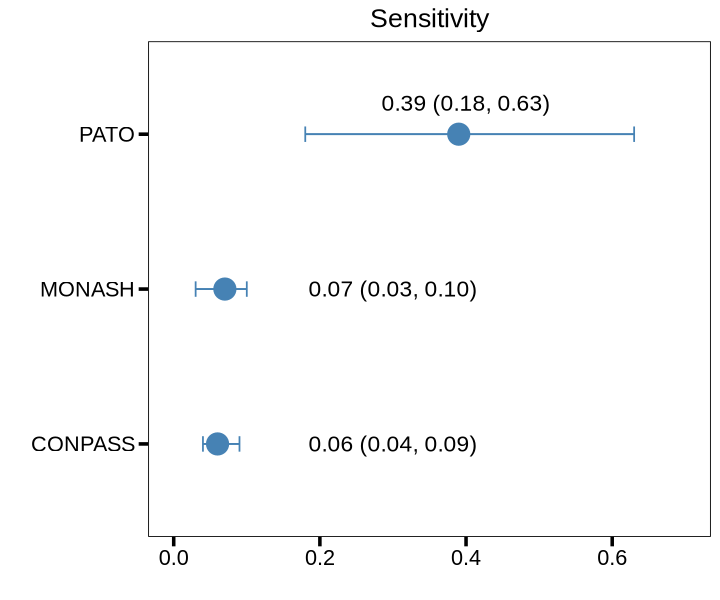

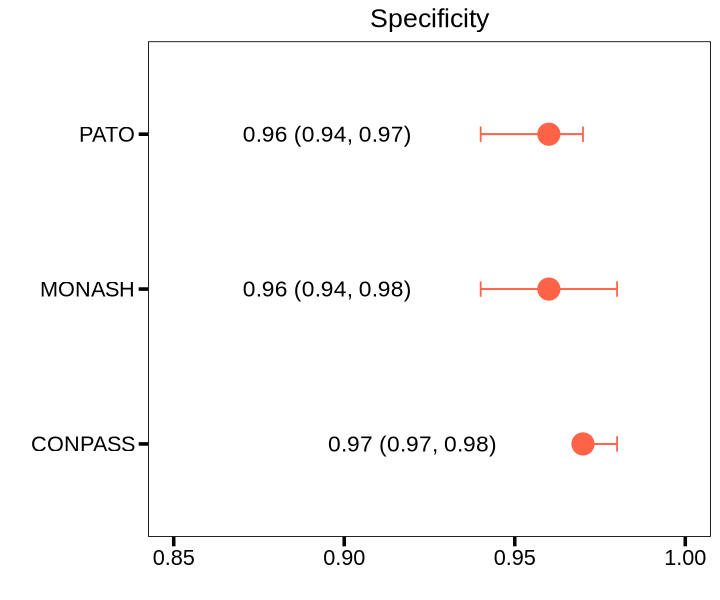

In [6]:
# Sensitivity plot
sensitivity_plot <- create_forest_plot(
  data = table_forest_plot[1:3, ],
  title = "Sensitivity",
  color = "#4682b4",
  xlim = c(0, 0.7),
  annotations = list(
    x = c(0.4, 0.3, 0.3),
    y = c(3.2, 2, 1),
    labels = c("0.39 (0.18, 0.63)", "0.07 (0.03, 0.10)", "0.06 (0.04, 0.09)")
  )
)

# Specificity plot
specificity_plot <- create_forest_plot(
  data = table_forest_plot[4:6, ],
  title = "Specificity",
  color = "#ff6347",
  xlim = c(0.85, 1),
  annotations = list(
    x = c(0.895, 0.895, 0.92),
    y = c(3, 2, 1),
    labels = c("0.96 (0.94, 0.97)", "0.96 (0.94, 0.98)", "0.97 (0.97, 0.98)")
  )
)

# Display plots
options(repr.plot.width = 6, repr.plot.height = 5)
print(sensitivity_plot)
print(specificity_plot)

In [7]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/luo_wenjin/mambaforge/envs/rstudio/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

time zone: Asia/Chongqing
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] repr_1.1.7        ggplot2_3.5.1     lsmeans_2.30-0    emmeans_1.10.4   
[5] tableone_0.13.2   tidyr_1.3.1       dplyr_1.1.4       data.table_1.15.4

loaded via a namespace (and not attached):
 [1] sandwich_3.0-2    utf8_1.2